In [1]:
from lsst.pipe.tasks.imageDifference import ImageDifferenceTask
import lsst.afw.display as afwDisplay
from lsst.daf.butler import Butler
import matplotlib.pyplot as plt
import lsst.geom
import astropy.units as u 
import lsst.afw.image as afwImage
from astropy.coordinates import SkyCoord


#from lsst.ip.diffim.ZogyConfig 

In [5]:
#data_dir = '/home/jahumada/data_hits'
#butler = dafPersist.Butler(data_dir)
butler = Butler('/home/jahumada/data_hits')

In [6]:
registry = butler.registry
#data_types = butler.get()
# 2019 night visits: 411633, 411784, 411834, 411683, 411734
visits = [410891, 410947, 410997, 411432, 411231, 411281, 411331, 411381, 412036, 412086, 412226, 412280, 742019, 742013, 742020, 742014]

#for ref in registry.queryDatasets('deepDiff*', collections="imagDiff_SNe/Blind15A_02_v6/20220208T080733Z", instrument='DECam'):
#    print(ref.dataId.full['visit'])
#diff_data_types = [x for x in data_types if x.startswith('deepDiff') ]

In [21]:
#butler.queryMetadata('deepDiff_differenceExp', ('visit'), dataId={'filter': 'g'})[:10]

In [9]:
#ImageDifferenceTask.run()
#goodSeeingCoadd
collection_diff = "imagDiff_SNe/Blind15A_02_v6/20220208T080733Z"
collection_calexp = "processCcdOutputs/Blind15A_02"
i = 7 # index of visit
ccd_num =35
calexp = butler.get('calexp', visit= visits[i], detector= ccd_num, instrument='DECam', collections=collection_calexp)
calexp_im = calexp.getMaskedImage()
calexp_cat = butler.get('src', visit= visits[i], detector= ccd_num, instrument='DECam', collections=collection_calexp)

diffexp = butler.get('goodSeeingDiff_differenceExp',visit=visits[i], detector=ccd_num , collections=collection_diff, instrument='DECam')
diffexp_cat = butler.get('goodSeeingDiff_diaSrc',visit=visits[i], detector=ccd_num , collections=collection_diff, instrument='DECam')
diffexp_im = diffexp.getMaskedImage()

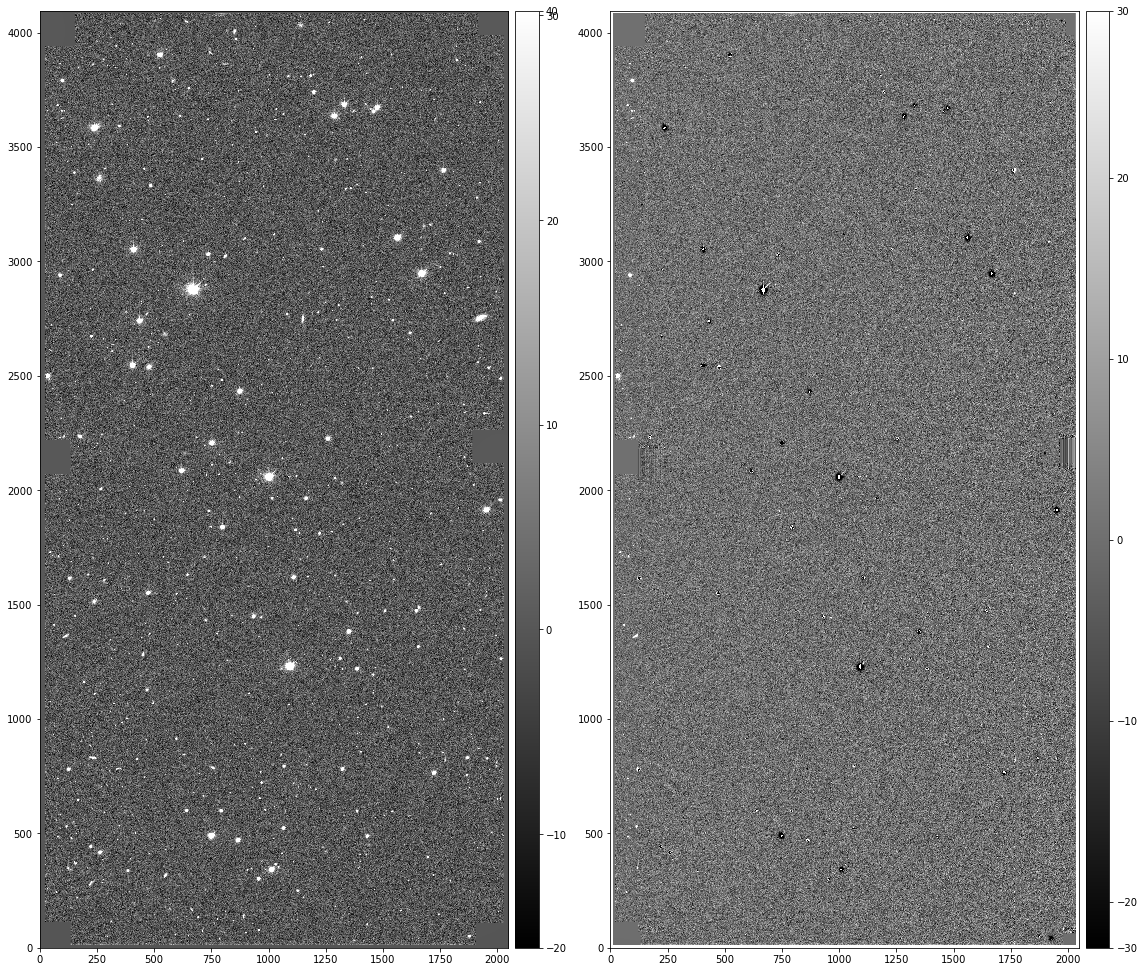

In [10]:
afwDisplay.setDefaultMaskTransparency(100)
afwDisplay.setDefaultBackend('matplotlib')


fig = plt.figure(figsize=(16, 14))
#display = []

fig.add_subplot(1,2,1)
display = afwDisplay.Display(frame=fig)
display.scale('linear', 'zscale')
display.mtv(calexp_im)

fig.add_subplot(1,2,2)
display=afwDisplay.Display(frame=fig)
display.scale('linear', 'zscale')
#display[1].setMaskTransparency(10)
display.mtv(diffexp_im)

plt.tight_layout()

In [ ]:
# 137.587 -4.36319

In [58]:
wcs = diffexp.getWcs()
wcs

FITS standard SkyWcs:
Sky Origin: (137.2201398212, -4.3741471583)
Pixel Origin: (953.97, 2007.38)
Pixel Scale: 0.26376 arcsec/pixel

In [67]:
arcsec_to_pixel = 0.26376 * u.arcsec
((137.587-137.2201398212) * u.degree ).to(u.arcsec)/arcsec_to_pixel

<Quantity 5007.19079345>

In [70]:
obj_pos = SkyCoord('09:10:20.89 -04:21:47.47',unit=(u.hourangle, u.degree))
obj_pos_lsst = lsst.geom.SpherePoint(obj_pos.ra.deg, obj_pos.dec.deg, lsst.geom.degrees)

In [71]:
x_pix, y_pix = wcs.skyToPixel(obj_pos_lsst)

In [72]:
print(x_pix, y_pix)
print(diffexp.getDimensions())

810.8065873475005 7004.271369978719
(2048, 4096)


In [73]:
x_half_width = 40
y_half_width = 40


In [74]:
bbox = lsst.geom.Box2I()
bbox.include(lsst.geom.Point2I(x_pix - x_half_width, y_pix - y_half_width))
bbox.include(lsst.geom.Point2I(x_pix + x_half_width, y_pix + y_half_width))

In [75]:
#calexp_cutout = calexp.Factory(calexp, bbox, origin=afwImage.LOCAL, deep=False)
#diffexp_cutout = diffexp.Factory(diffexp, bbox, origin=afwImage.LOCAL, deep=False)

calexp_cutout = calexp.getCutout(obj_pos_lsst, size=lsst.geom.Extent2I(80, 80))
diffexp_cutout = diffexp.getCutout(obj_pos_lsst, size=lsst.geom.Extent2I(80, 80))

InvalidParameterError: 
  File "src/image/Exposure.cc", line 215, in lsst::afw::image::Exposure<ImagePixelT, MaskPixelT, VariancePixelT> lsst::afw::image::Exposure<ImageT, MaskT, VarianceT>::getCutout(const lsst::geom::SpherePoint&, const Extent2I&) const [with ImageT = float; MaskT = int; VarianceT = float; lsst::geom::Extent2I = lsst::geom::Extent<int, 2>]
    Point (137.5870416667, -4.3631861111) lies at pixel (810.804, 7004.27), which lies outside Exposure Box2I(Point2I(0, 0), Extent2I(2048, 4096)) {0}
lsst::pex::exceptions::InvalidParameterError: 'Point (137.5870416667, -4.3631861111) lies at pixel (810.804, 7004.27), which lies outside Exposure Box2I(Point2I(0, 0), Extent2I(2048, 4096))'


In [99]:
for i in butler.registry.queryDatasets("goodSeeingCoadd", collections=collection):
    print(i)

goodSeeingCoadd@{band: 'g', skymap: 'discrete/hits', tract: 1, patch: 50}, sc=ExposureF] (id=144fd294-10dd-43ac-bb1c-7f226e91c74d)
goodSeeingCoadd@{band: 'g', skymap: 'discrete/hits', tract: 1, patch: 85}, sc=ExposureF] (id=e075daf2-7867-4575-be19-1ae6ccfffce4)
goodSeeingCoadd@{band: 'g', skymap: 'discrete/hits', tract: 1, patch: 59}, sc=ExposureF] (id=070e579b-3d77-471c-b0a2-023628ac4042)
goodSeeingCoadd@{band: 'g', skymap: 'discrete/hits', tract: 1, patch: 75}, sc=ExposureF] (id=f04d3685-40b0-4e9f-a70c-52ff3e50bf42)
goodSeeingCoadd@{band: 'g', skymap: 'discrete/hits', tract: 1, patch: 46}, sc=ExposureF] (id=35f26fde-7dba-47e5-a42c-c44fce3b5b11)
goodSeeingCoadd@{band: 'g', skymap: 'discrete/hits', tract: 1, patch: 45}, sc=ExposureF] (id=3fb4318b-9c45-4c85-bc04-f502153cfd38)
goodSeeingCoadd@{band: 'g', skymap: 'discrete/hits', tract: 1, patch: 36}, sc=ExposureF] (id=a1b1aa27-6c83-4b49-a8dc-23dd70d25019)
goodSeeingCoadd@{band: 'g', skymap: 'discrete/hits', tract: 1, patch: 91}, sc=Expos

In [96]:
butler.get("goodSeeingCoadd",dataId ={'band': 'g', 'skymap': 'discrete/hits', 'tract': *, 'patch': *}, collections=collection)

SyntaxError: invalid syntax (1584567746.py, line 1)

In [40]:
butler.registry.queryDatasets("goodSeeingCoadd_nImage@{band: 'g', skymap: 'discrete/hits', tract: 1, patch: 40}, sc=ImageU] (id=ac6cb6f5-e3fb-438d-9119-1f7c4c654ba1)", collections=collection)

In [105]:
coadd = butler.get("goodSeeingCoadd", dataId ={'band': 'g', 'skymap': 'discrete/hits', 'tract': 1, 'patch': 49},detector=36, collections=collection, instrument='DECam')


Text(0.5, 1.0, 'CCD 8')

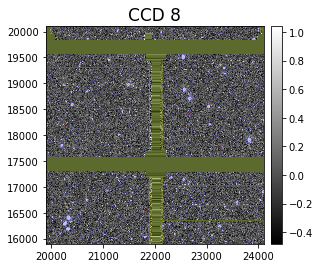

In [93]:
afwDisplay.setDefaultBackend('matplotlib')
display.setMaskTransparency(100)

fig = plt.figure()

#fig.add_subplot(10,10,1) 
display = afwDisplay.Display(frame=fig) 
display.scale('linear', 'zscale') 
display.mtv(coadd) 
plt.title('CCD 8', fontsize=17) 
#plt.axis('off')

Text(0.5, 1.0, 'CCD 8')

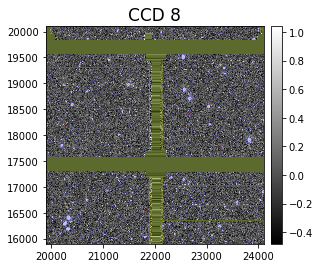

In [68]:
afwDisplay.setDefaultBackend('matplotlib')
display.setMaskTransparency(100)

fig = plt.figure()

#fig.add_subplot(10,10,1) 
display = afwDisplay.Display(frame=fig) 
display.scale('linear', 'zscale') 
display.mtv(coadd) 
plt.title('CCD 8', fontsize=17) 
#plt.axis('off')

In [77]:

calexp_src_cat = butler.get('src', visit= 410891, detector=36, instrument='DECam', collections='processCcdOutputs/Blind15A_02')
calexp = butler.get('calexp', visit= 410891, detector=36, instrument='DECam', collections='processCcdOutputs/Blind15A_02')

In [103]:
skymap = butler.get('skyMap', skymap='discrete/hits', collections='skymaps')
for i in skymap:
    print(i)

TractInfo(id=0)
TractInfo(id=1)
TractInfo(id=2)
TractInfo(id=3)
TractInfo(id=4)
TractInfo(id=5)
TractInfo(id=6)
TractInfo(id=7)
TractInfo(id=8)
TractInfo(id=9)
TractInfo(id=10)
TractInfo(id=11)
TractInfo(id=12)
TractInfo(id=13)
TractInfo(id=14)
TractInfo(id=15)
TractInfo(id=16)
TractInfo(id=17)
TractInfo(id=18)
TractInfo(id=19)
TractInfo(id=20)
TractInfo(id=21)
TractInfo(id=22)
TractInfo(id=23)
TractInfo(id=24)
TractInfo(id=25)
TractInfo(id=26)
TractInfo(id=27)
TractInfo(id=28)
TractInfo(id=29)
TractInfo(id=30)
TractInfo(id=31)
TractInfo(id=32)
TractInfo(id=33)
TractInfo(id=34)
TractInfo(id=35)
TractInfo(id=36)
TractInfo(id=37)
TractInfo(id=38)
TractInfo(id=39)
TractInfo(id=40)
TractInfo(id=41)


Text(0.5, 1.0, 'Calexp Image and Source Catalog')

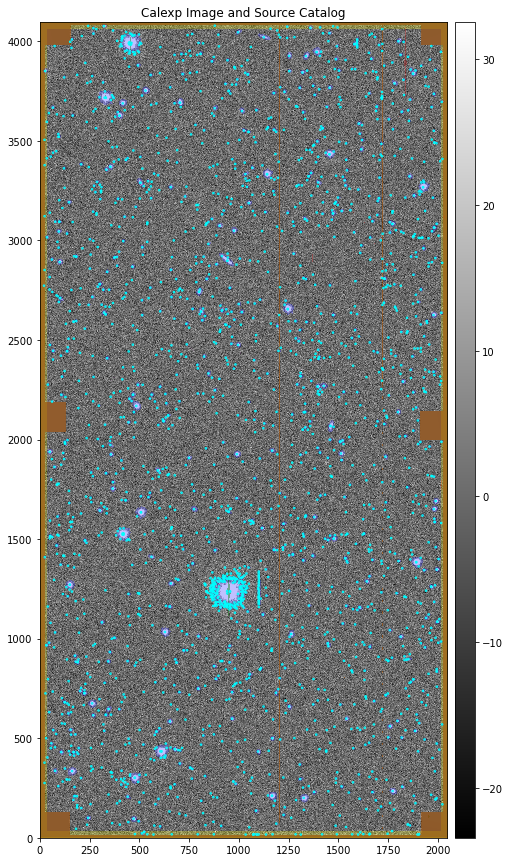

In [89]:

calexp_src_cat
fig = plt.figure(figsize=(15,15))
stamp_display = []
stamp_display.append(afwDisplay.Display(frame=fig))

#fig.add_subplot(10,10,1) 
#display = afwDisplay.Display(frame=fig) 
stamp_display[0].scale('linear', 'zscale') 
stamp_display[0].mtv(calexp)

for src in calexp_src_cat:
    #print(src.getX(), src.getY())
    stamp_display[0].dot('o', src.getX(), src.getY(), ctype='cyan', size=4)
    #plt.Circle((src.getX(), src.getY()),facecolor=None,  edgecolor='cyan', radius=4)

plt.title('Calexp Image and Source Catalog')

In [107]:
help(ImageDifferenceTask.run)

Help on function run in module lsst.pipe.tasks.imageDifference:

run(self, exposure=None, selectSources=None, templateExposure=None, templateSources=None, idFactory=None, calexpBackgroundExposure=None, subtractedExposure=None)
    PSF matches, subtract two images and perform detection on the difference image.
    
    Parameters
    ----------
    exposure : `lsst.afw.image.ExposureF`, optional
        The science exposure, the minuend in the image subtraction.
        Can be None only if ``config.doSubtract==False``.
    selectSources : `lsst.afw.table.SourceCatalog`, optional
        Identified sources on the science exposure. This catalog is used to
        select sources in order to perform the AL PSF matching on stamp images
        around them. The selection steps depend on config options and whether
        ``templateSources`` and ``matchingSources`` specified.
    templateExposure : `lsst.afw.image.ExposureF`, optional
        The template to be subtracted from ``exposure`` in 

In [ ]:
ImageDifferenceTask.run(exposure=calexp, selectSources=calexp_src_cat, )